# Installation

In [ ]:
!pip install numpy pandas matplotlib scikit-learn

# 1. Importing

In [33]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 2. Load Dataset

In [12]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The dataset contains 150 samples of iris flowers, with three species:

- Iris setosa
- Iris versicolor
- Iris virginica

The target variable consists of three classes corresponding to the three iris species, making it a multiclass classification problem.

# 3. Extract Features

In [20]:
X = df[['petal_length']].values  # Features
y = df['petal_width'].values    # Target

Models like `LinearRegression` are built to handle multiple features (columns) and expect the input to have a 2D structure

# 4. Preprocess Data

# 5. Split the Data into Training and Test Sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Create the model

## 6.1 Create the Polynomial Features

In [22]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# 6.2 Create the model

In [23]:
model = LinearRegression()

# 7. Train the model

In [24]:
model.fit(X_train_poly, y_train)

LinearRegression()

# 8. Make Predictions

In [25]:
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

In [26]:
y_pred_train

array([0.05486846, 0.26272368, 1.46283408, 0.30426156, 0.17961476,
       1.70997206, 1.50405138, 0.26272368, 0.22117475, 0.26272368,
       1.75112303, 1.50405138, 1.58645281, 0.17961476, 0.26272368,
       1.17400345, 1.75112303, 1.91561637, 1.46283408, 2.16202475,
       1.38036631, 2.36706107, 1.50405138, 0.22117475, 2.40803517,
       1.33911585, 0.22117475, 0.17961476, 0.42880888, 1.09138093,
       1.66881003, 0.42880888, 0.30426156, 0.34578839, 1.38036631,
       0.26272368, 1.38036631, 2.40803517, 0.22117475, 1.42160572,
       1.70997206, 0.22117475, 1.62763695, 1.75112303, 1.29785433,
       1.50405138, 1.87450962, 1.29785433, 0.34578839, 1.00871419,
       1.83339181, 0.22117475, 0.13804371, 1.21529814, 1.70997206,
       0.26272368, 1.75112303, 0.26272368, 0.30426156, 1.62763695,
       0.88463116, 1.99779672, 1.75112303, 1.95671207, 2.16202475,
       1.29785433, 0.22117475, 0.09646162, 1.70997206, 2.12098433,
       0.26272368, 0.22117475, 0.17961476, 1.66881003, 1.95671

In [27]:
y_pred_test

array([1.58645281, 0.34578839, 2.48995021, 1.50405138, 1.62763695,
       0.26272368, 1.13269772, 1.75112303, 1.50405138, 1.25658176,
       1.75112303, 0.22117475, 0.17961476, 0.26272368, 0.26272368,
       1.58645281, 2.03887031, 1.25658176, 1.50405138, 1.95671207,
       0.30426156, 1.66881003, 0.30426156, 1.95671207, 2.28507971,
       1.79226295, 2.03887031, 2.07993284, 0.22117475, 0.30426156])

# 9. Evaluate the Model

In [30]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

In [31]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.1682107429772371
Mean Squared Error (MSE): 0.04554975911437924
Root Mean Squared Error (RMSE): 0.21342389536876896
R² Score: 0.9283420734448403


# 10. Visualization

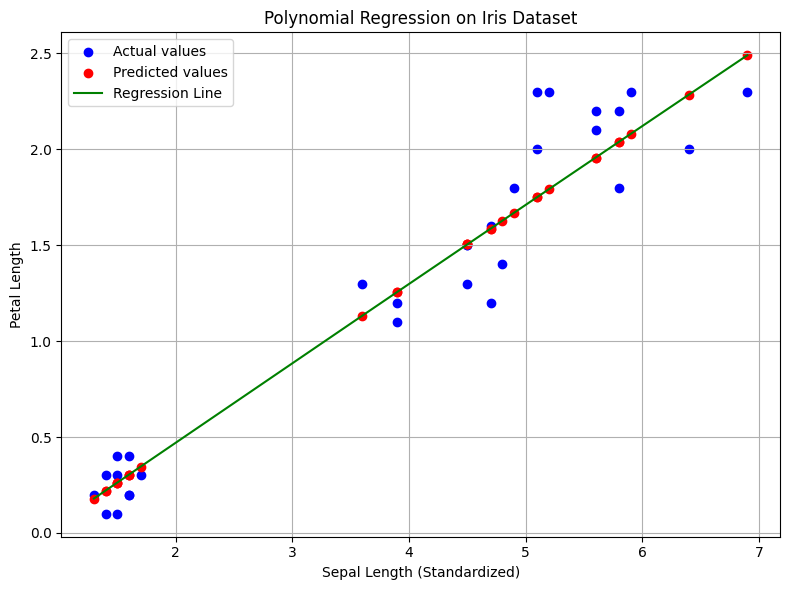

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, y_pred_test, color='red', label='Predicted values')
# Plot the polynomial regression line using sorted values for smooth curve
X_sorted = np.sort(X_test, axis=0)
y_sorted = model.predict(poly_features.transform(X_sorted))
plt.plot(X_sorted, y_sorted, color='green', label='Regression Line')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Petal Length')
plt.title('Polynomial Regression on Iris Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Polynomial Equation

In [36]:
beta0 = model.intercept_  # Intercept
beta1 = model.coef_[0]   # Slope 1
beta2 = model.coef_[1]   # Slope 2
print(f"Regression Line Equation: Y = {beta0} + {beta1} * X + {beta2} * X^2")

Regression Line Equation: Y = -0.3616710628082931 + 0.0 * X + 0.41709225128301536 * X^2


Polynomial features build with degree 2 previously